In [1]:
from pstats import Stats
import matplotlib.pyplot as plt
from typing import Any

In [2]:
problems = [
    "translated_imo_2000_p1",
    "translated_imo_2000_p6",
    "translated_imo_2002_p2a",
    "translated_imo_2002_p2b",
    "translated_imo_2003_p4",
    "translated_imo_2004_p1",
    "translated_imo_2004_p5",
    "translated_imo_2005_p5",
    "translated_imo_2007_p4",
    "translated_imo_2008_p1a",
    "translated_imo_2008_p1b",
    # "translated_imo_2008_p6",
    "translated_imo_2009_p2",
    "translated_imo_2010_p2",
    "translated_imo_2010_p4",
    "translated_imo_2011_p6",
    "translated_imo_2012_p1",
    "translated_imo_2012_p5",
    "translated_imo_2013_p4",
    "translated_imo_2014_p4",
    "translated_imo_2015_p3",
    "translated_imo_2015_p4",
    "translated_imo_2016_p1",
    "translated_imo_2017_p4",
    "translated_imo_2018_p1",
    "translated_imo_2019_p2",
    "translated_imo_2019_p6",
    "translated_imo_2020_p1",
    "translated_imo_2021_p3",
    "translated_imo_2022_p4",
]

In [3]:

for problem in problems:
    with open(f"../profiling_exp/{problem}/run_infos.txt", "r") as f:
        # print("original rule set", problem, eval(f.read())['success'], eval(f.read())['runtime'])
        print("original rule set", problem, eval(f.read())['runtime'])


original rule set translated_imo_2000_p1 811.9390771389008
original rule set translated_imo_2000_p6 8371.561145067215
original rule set translated_imo_2002_p2a 112.85705971717834
original rule set translated_imo_2002_p2b 112.40153908729553
original rule set translated_imo_2003_p4 798.7773571014404
original rule set translated_imo_2004_p1 439.6988196372986
original rule set translated_imo_2004_p5 18.873297929763794
original rule set translated_imo_2005_p5 1377.0051019191742
original rule set translated_imo_2007_p4 813.5918779373169
original rule set translated_imo_2008_p1a 2288.5287363529205
original rule set translated_imo_2008_p1b 2286.6677918434143
original rule set translated_imo_2009_p2 445.6793541908264
original rule set translated_imo_2010_p2 441.84201526641846
original rule set translated_imo_2010_p4 231.29077816009521
original rule set translated_imo_2011_p6 12190.260713338852
original rule set translated_imo_2012_p1 825.8394205570221
original rule set translated_imo_2012_p5 11

In [4]:
for problem in problems:
    with open(f"../profiling_opt/{problem}/run_infos.txt", "r") as f:
        print("optimized rule set", problem, eval(f.read())['runtime'])

optimized rule set translated_imo_2000_p1 687.7260217666626
optimized rule set translated_imo_2000_p6 7311.118611812592
optimized rule set translated_imo_2002_p2a 96.37491965293884
optimized rule set translated_imo_2002_p2b 96.20866560935974
optimized rule set translated_imo_2003_p4 695.0639133453369
optimized rule set translated_imo_2004_p1 376.76526975631714
optimized rule set translated_imo_2004_p5 15.513340711593628
optimized rule set translated_imo_2005_p5 1183.8947706222534
optimized rule set translated_imo_2007_p4 654.4989140033722
optimized rule set translated_imo_2008_p1a 1914.4817657470703
optimized rule set translated_imo_2008_p1b 1910.0397844314575
optimized rule set translated_imo_2009_p2 373.13578724861145
optimized rule set translated_imo_2010_p2 378.61624002456665
optimized rule set translated_imo_2010_p4 194.68379473686218
optimized rule set translated_imo_2011_p6 10905.937153577805
optimized rule set translated_imo_2012_p1 704.0762956142426
optimized rule set translat

[0.88766435] -26.60975452234311
[0.87594637] -11.743861146718517


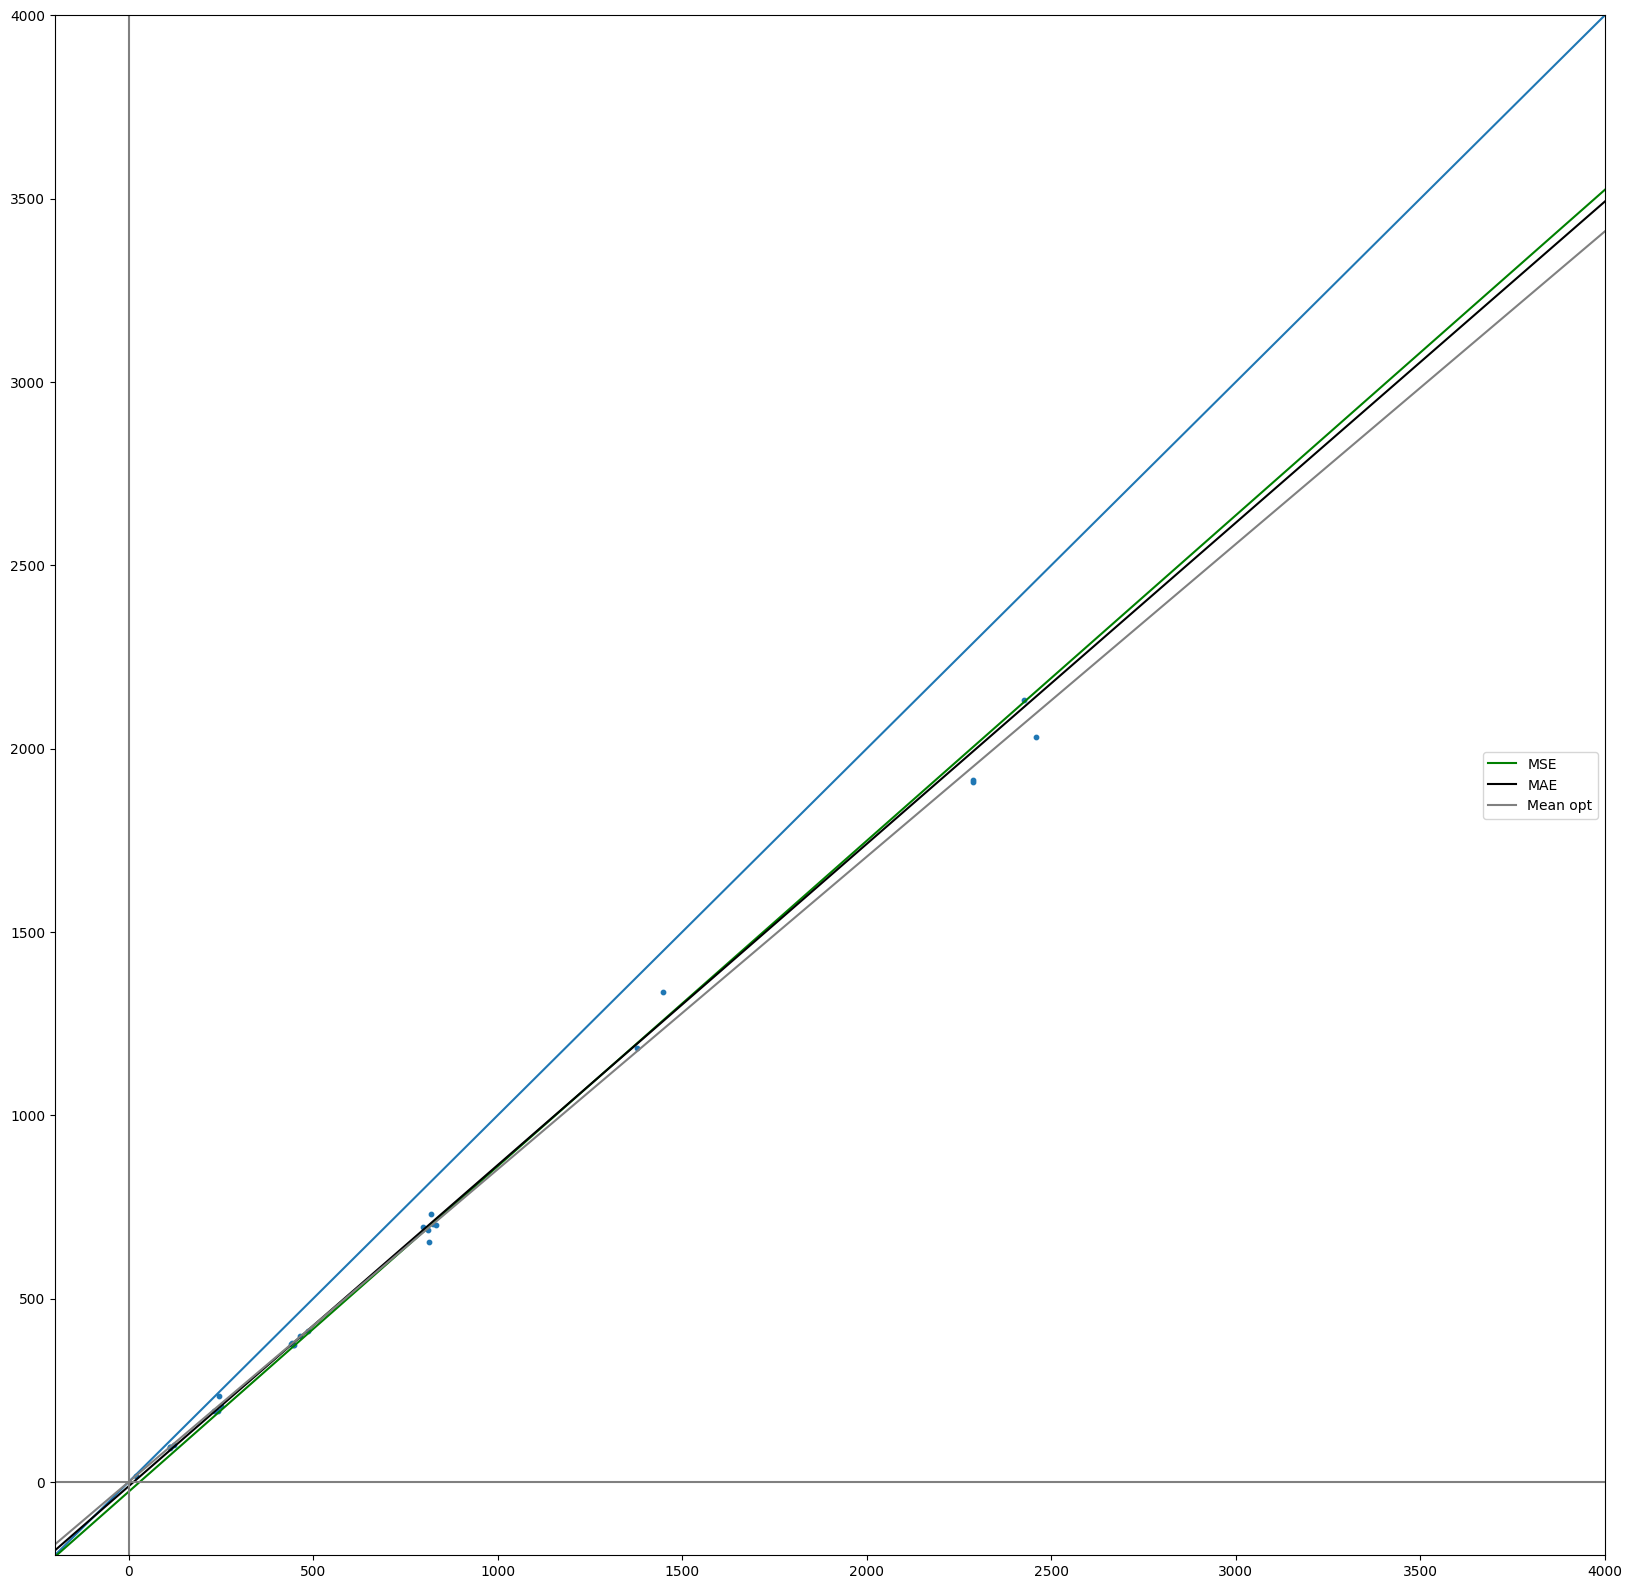

In [5]:
from sklearn.linear_model import LinearRegression, HuberRegressor
import numpy as np
x: list[float] = []
y: list[float] = []
for problem in problems:
    with open(f"../profiling_exp/{problem}/run_infos.txt", "r") as f:
        x.append(eval(f.read())['runtime'])
for problem in problems:
    with open(f"../profiling_opt/{problem}/run_infos.txt", "r") as f:
        y.append(eval(f.read())['runtime'])
data_x = np.array(x).reshape(-1, 1)
data_y = np.array(y)
plt.figure(figsize=(20, 20))
plt.axline((0, 0), (1, 1))
plt.scatter(x, y, s=10)
# for i in range(len(problems)):
#     plt.annotate(f"{y[i]/x[i]:.2f}", (x[i], y[i]))
mse = LinearRegression()
mae = HuberRegressor()
mse.fit(data_x, data_y)
mae.fit(data_x, data_y)
plt.axline((0, mse.intercept_), slope=mse.coef_[0], color='green', label="MSE")
plt.axline((0, mae.intercept_), slope=mae.coef_[0], color='black', label="MAE")
plt.axline((0,0), slope=sum(y[i]/x[i] for i in range(len(problems)))/len(problems), color='grey', label="Mean opt")
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(-200, 4000)
plt.ylim(-200, 4000)
plt.legend()
print(mse.coef_, mse.intercept_)
print(mae.coef_, mae.intercept_)

In [6]:
stats = Stats(f'../profiling_exp/translated_imo_2000_p1/profile.prof')
stats.print_callees()

   Random listing order was used

Function                                                                                                                        called...
                                                                                                                                    ncalls  tottime  cumtime
/usr/local/lib/python3.11/encodings/__init__.py:43(normalize_encoding)                                                          ->       1    0.000    0.000  {built-in method builtins.isinstance}
                                                                                                                                        14    0.000    0.000  {method 'append' of 'list' objects}
                                                                                                                                        14    0.000    0.000  {method 'isalnum' of 'str' objects}
                                                                                       

In [7]:
code_to_name = {
    ('/workspace/src/geosolver/predicates/equal_ratios.py', 32, 'parse'): 'eqratio',
    ('/workspace/src/geosolver/predicates/equal_ratios.py', 36, 'check_numerical'): 'eqratio',
    ('/workspace/src/geosolver/predicates/equal_angles.py', 49, 'parse'): 'eqangle',
    ('/workspace/src/geosolver/predicates/equal_angles.py', 56, 'check_numerical'): 'eqangle',
    ('/workspace/src/geosolver/predicates/cyclic.py', 33, 'parse'): 'cyclic',
    ('/workspace/src/geosolver/predicates/cyclic.py', 40, 'check_numerical'): 'cyclic',
    ('/workspace/src/geosolver/predicates/parallelism.py', 35, 'parse'): 'para',
    ('/workspace/src/geosolver/predicates/parallelism.py', 41, 'check_numerical'): 'para',
    ('/workspace/src/geosolver/predicates/triangles_similar.py', 44, 'parse'): 'simtri',
    ('/workspace/src/geosolver/predicates/triangles_similar.py', 51, 'check_numerical'): 'simtri',
    ('/workspace/src/geosolver/predicates/triangles_similar.py', 100, 'parse'): 'simtrir',
    ('/workspace/src/geosolver/predicates/triangles_similar.py', 107, 'check_numerical'): 'simtrir',
    ('/workspace/src/geosolver/predicates/circumcenter.py', 34, 'parse'): 'circle',
    ('/workspace/src/geosolver/predicates/circumcenter.py', 43, 'check_numerical'): 'circle',
    ('/workspace/src/geosolver/predicates/sameclock.py', 30, 'parse'): 'sameclock',
    ('/workspace/src/geosolver/predicates/sameclock.py', 39, 'check_numerical'): 'sameclock',
    ('/workspace/src/geosolver/predicates/congruence.py', 46, 'parse'): 'cong',
    ('/workspace/src/geosolver/predicates/congruence.py', 55, 'check_numerical'): 'cong',
    ('/workspace/src/geosolver/statement.py', 17, '__init__'): 'statement instantiation',
}

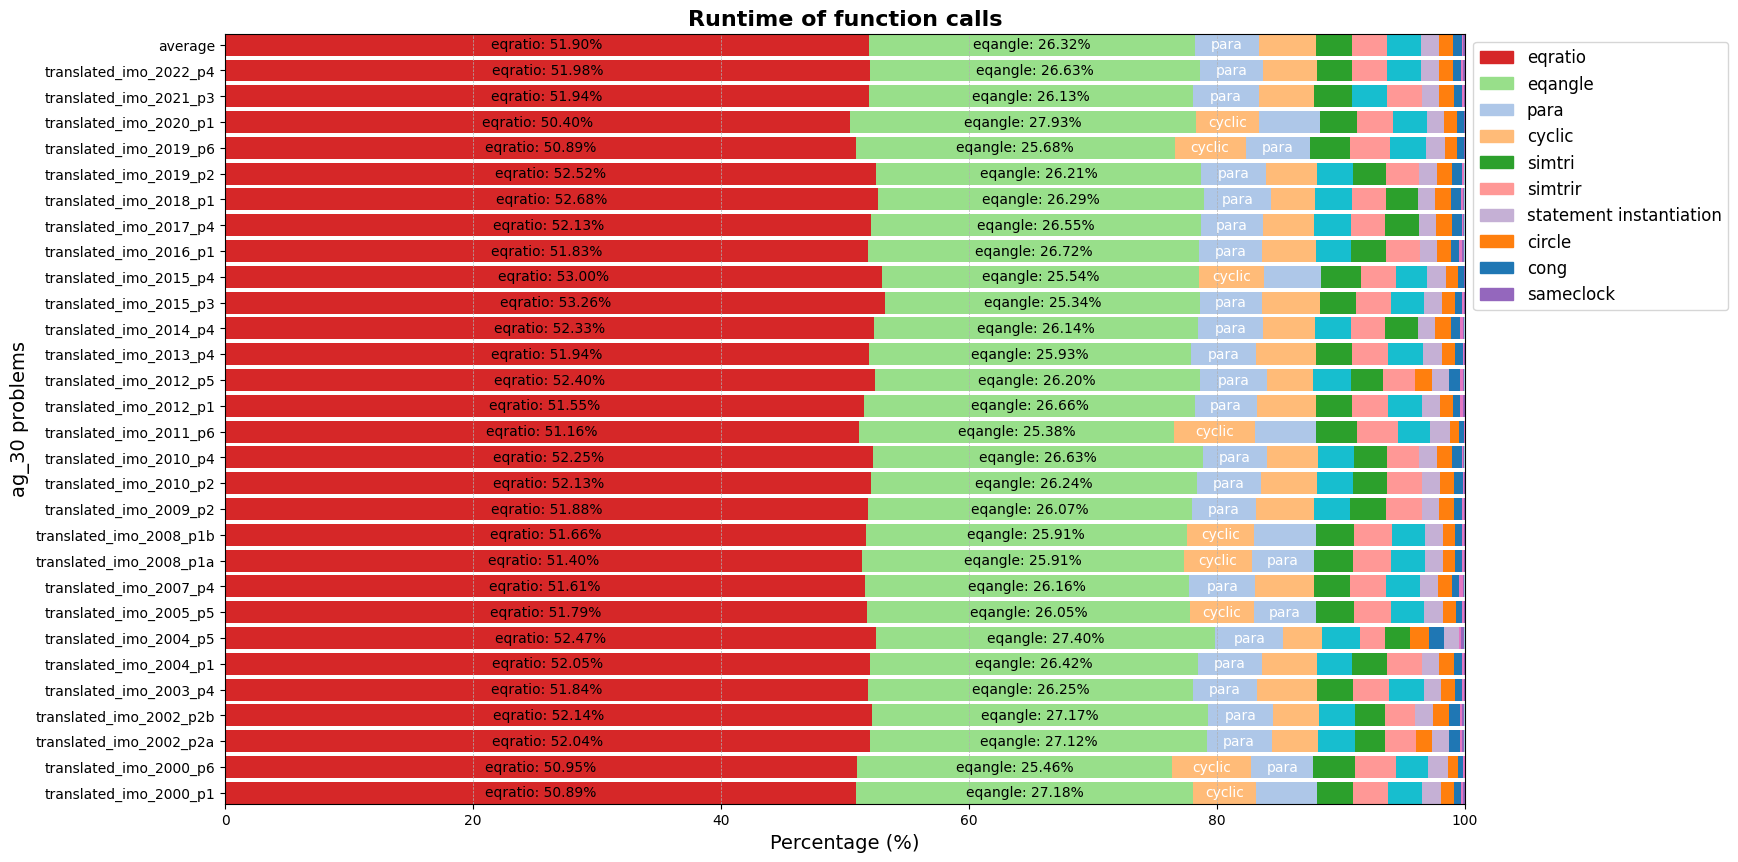

In [8]:
def div_bar_diagram(profiles: dict[str, dict[Any, float]], fnames: list[Any]):
    fig, ax = plt.subplots(figsize=(16, 10)) # type:ignore
    colors: Any = plt.cm.tab20.colors # type: ignore
    f_data: dict[Any, dict[str, Any]] = {f:{'color': colors[fnames.index(f) % len(colors)], 'n': 0, 's': 0.} for f in fnames}

    for profile_name, profile_data in profiles.items():
        total = sum(profile_data.values())
        profile_data_sorted = sorted(profile_data.items(), key=lambda t: -t[1])
        cumulative = 0

        for k, v in profile_data_sorted:
            percentage = (v / total) * 100
            color = colors[fnames.index(k) % len(colors)]
            ax.barh(profile_name, percentage, left=cumulative, color=color, align='center', height=0.85)
            f_data[k]['n'] += 1
            f_data[k]['s'] += percentage

            # Improve text visibility with a bold white shadow and slightly larger font size
            if percentage > 10:
                ax.text(cumulative + percentage / 2, profile_name, f"{k}: {percentage:.2f}%", va='center', ha='center',
                        color='black', fontsize=10)
            elif percentage > 5:
                ax.text(cumulative + percentage / 2, profile_name, str(k), va='center', ha='center',
                        color='white', fontsize=10)

            cumulative += percentage

    # Add gridlines, title, and labels for better readability
    ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
    ax.set_title('Runtime of function calls', fontsize=16, weight='bold')
    ax.set_xlabel('Percentage (%)', fontsize=14)
    ax.set_ylabel('ag_30 problems', fontsize=14)

    for k in list(f_data.keys()):
        if f_data[k]['n'] == 0:
            del f_data[k]
    f_list = [(k, v['color'], v['s']/len(profiles)) for k, v in f_data.items()]
    f_list.sort(key=lambda t: -t[2])

    cumulative = 0
    for t in f_list:
        ax.barh('average', t[2], left=cumulative, color=t[1], align='center', height=0.85)
        if t[2] > 10:
            ax.text(cumulative + t[2] / 2, 'average', f"{t[0]}: {t[2]:.2f}%", va='center', ha='center',
                    color='black', fontsize=10)
        elif t[2] > 5:
            ax.text(cumulative + t[2] / 2, 'average', str(t[0]), va='center', ha='center',
                    color='white', fontsize=10)
        cumulative += t[2]

    handles = [plt.Rectangle((0, 0), 1, 1, color=t[1]) for t in f_list if isinstance(t[0], str)]
    ax.legend(handles, [f"{t[0]}" for t in f_list if isinstance(t[0], str)], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12) # + percentage

    return fig, ax

def draw_profiles(exp: str, entry: Any):
    fnames_set: set[Any] = set()
    profile_exp: dict[str, dict[Any, float]] = {}
    for problem in problems:
        stats = Stats(f'../profiling_{exp}/{problem}/profile.prof')
        stats.calc_callees()
        l = {code_to_name.get(k, k): v[3] for k, v in stats.all_callees[entry].items()} # type: ignore
        profile_exp[problem] = l # type: ignore
        fnames_set.update(l.keys()) # type: ignore
    fnames = list(fnames_set)
    fnames.sort(key=lambda x:(len(x) if isinstance(x, str) else 1000, x))
    div_bar_diagram(profile_exp, fnames)
    plt.margins(0)
    plt.show()

draw_profiles('exp', ('/workspace/src/geosolver/statement.py', 60, 'from_tokens'))

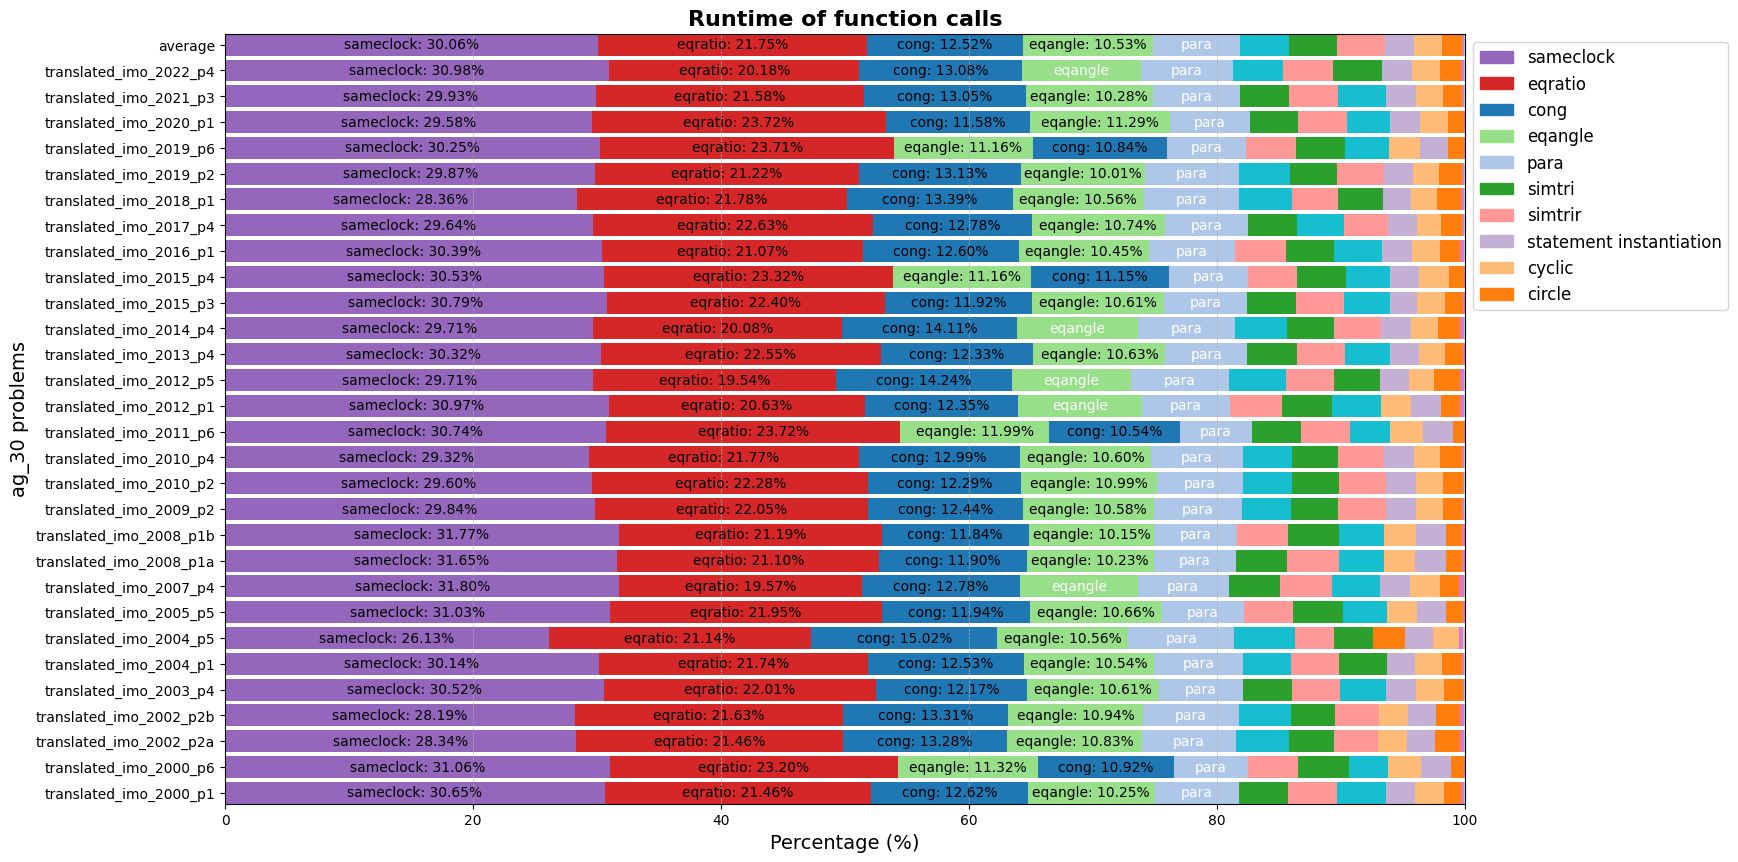

In [9]:
draw_profiles('opt', ('/workspace/src/geosolver/statement.py', 60, 'from_tokens'))

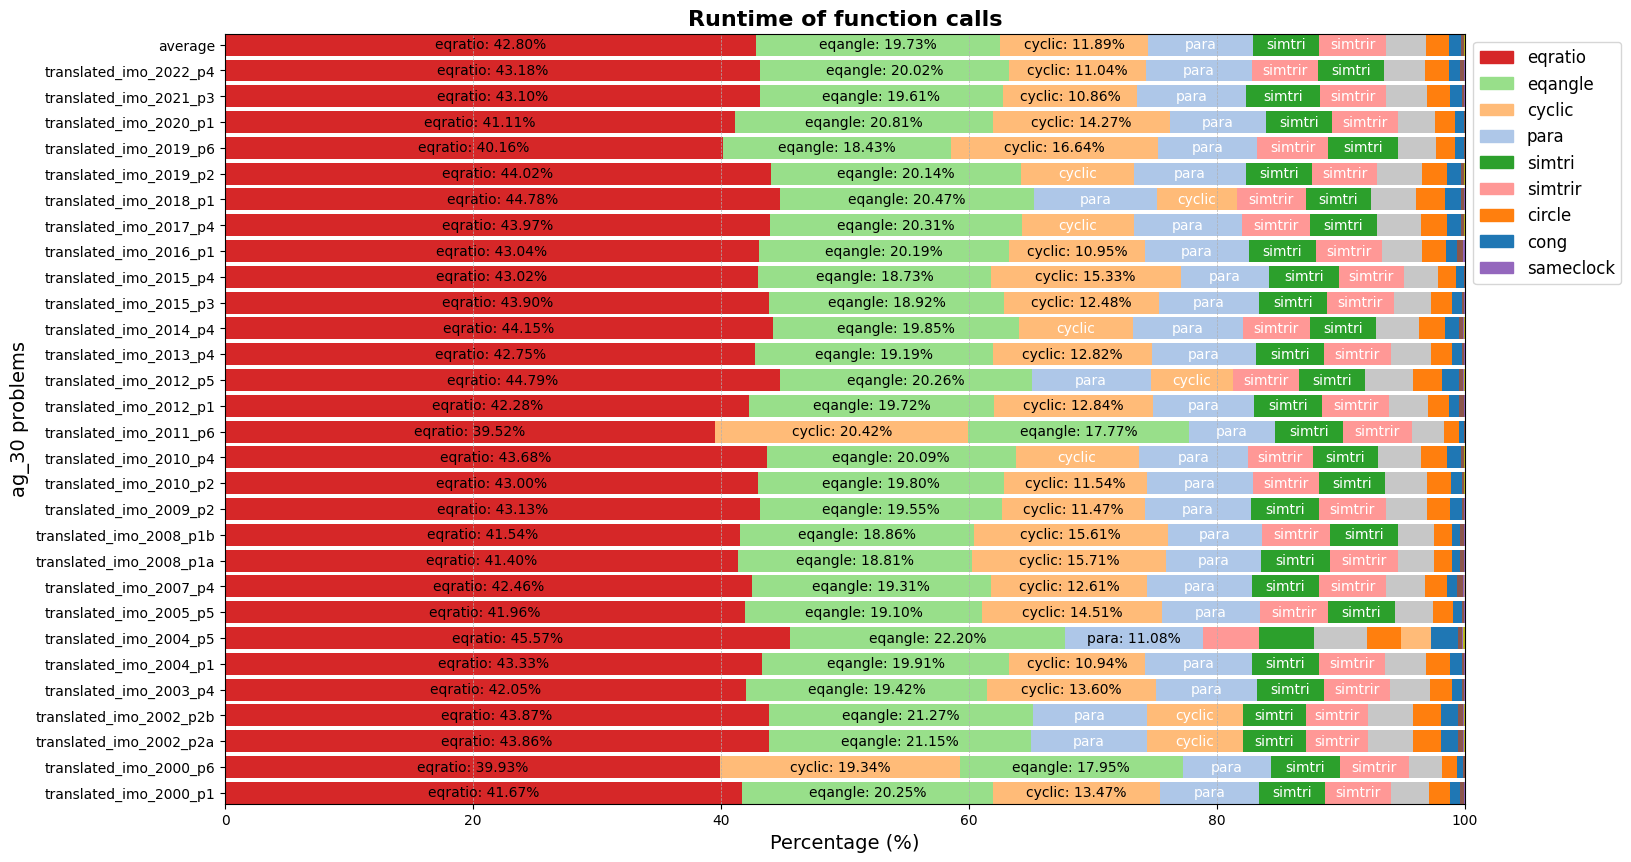

In [10]:
draw_profiles('exp', ('/workspace/src/geosolver/statement.py', 38, 'check_numerical'))

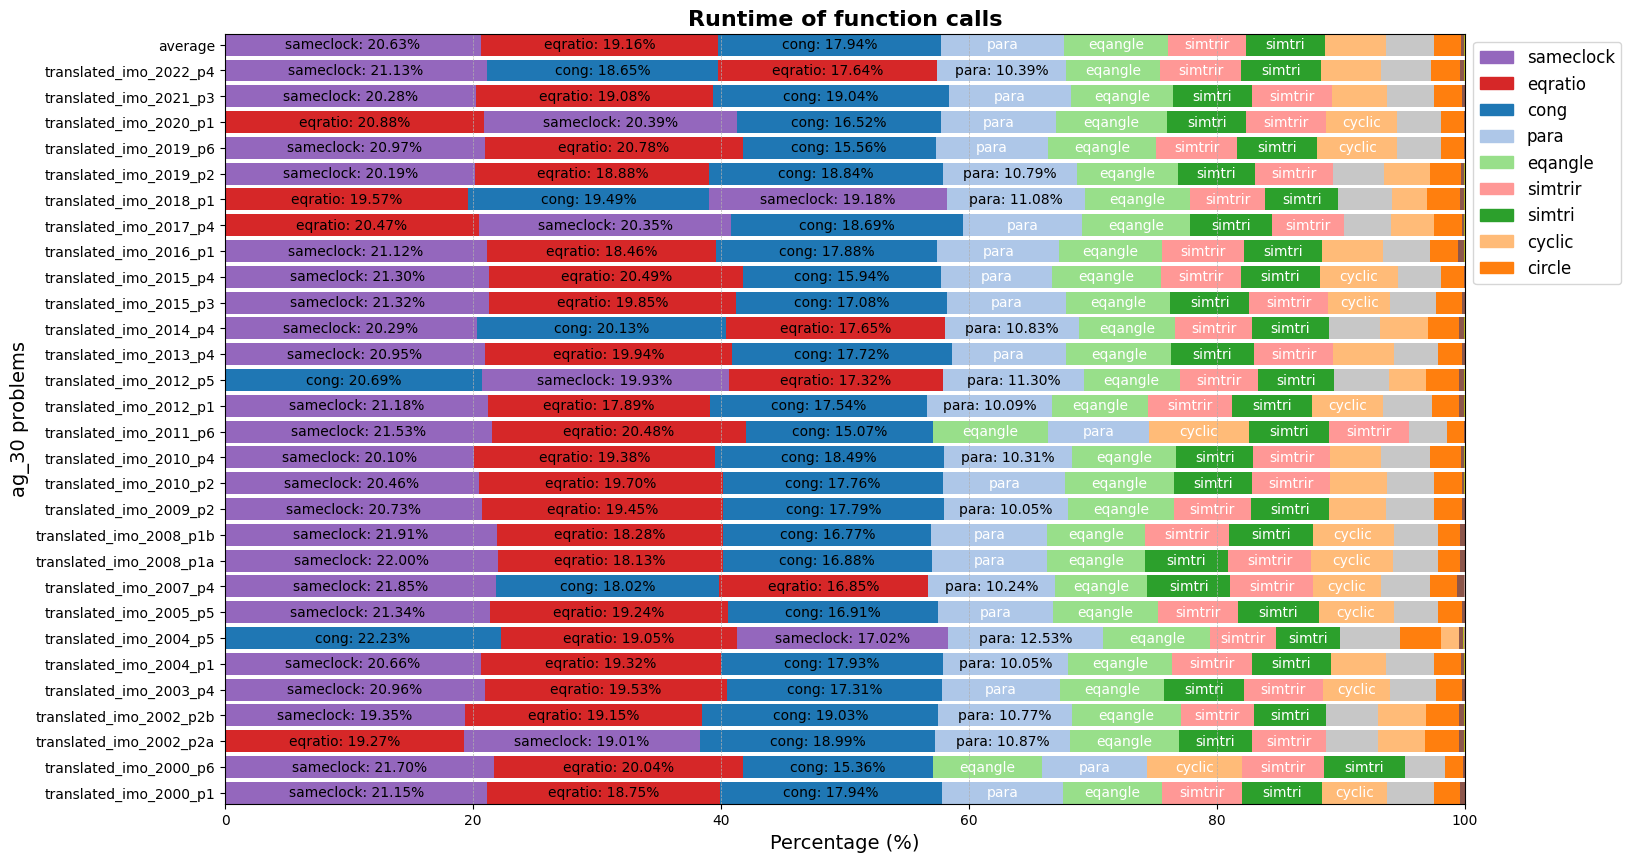

In [11]:
draw_profiles('opt', ('/workspace/src/geosolver/statement.py', 38, 'check_numerical'))